In [2]:
import sys
sys.path.insert(1, 'D:\Master\Blok3\AAS') #add path of toolbox

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
#custom modules
from toolbox import vis

Load and look at the data

In [4]:
df14 = pd.read_excel('data2014.xlsx', engine='openpyxl', header = 1)
df09 = pd.read_excel('data2009.xlsx', engine='openpyxl', header = 0)
df14.head()

,Rk,Team,Conf,W-L,AdjEM,AdjO,Unnamed: 6,AdjD,Unnamed: 8,AdjT,...,Luck,Unnamed: 12,AdjEM.1,Unnamed: 14,OppO,Unnamed: 16,OppD,Unnamed: 18,AdjEM.2,Unnamed: 20
0,1,Louisville 4,Amer,31-6,30.41,118.9,7,88.5,5,67.2,...,-0.045,278,4.31,95,107.0,100,102.7,93,-4.65,295
1,2,Arizona 1,P12,33-5,30.11,116.5,20,86.4,1,62.8,...,0.014,151,9.30,17,109.9,20,100.6,18,1.62,113
2,3,Florida 1,SEC,36-3,28.57,116.5,19,88.0,3,61.3,...,0.053,68,9.02,22,109.4,32,100.4,14,2.39,94
3,4,Virginia 1,ACC,2021-07-30 00:00:00,26.46,114.8,27,88.3,4,59.5,...,0.012,154,8.67,28,109.4,31,100.8,27,1.57,114
4,5,Wisconsin 2,B10,2021-08-30 00:00:00,25.89,122.0,4,96.1,35,62.4,...,0.019,133,11.44,3,110.2,13,98.8,2,3.33,68


Columns starting with 'Unnamed' are irrelevant.

# Histogram of Adjusted Difference

Select entries from conferences ACC, SEC, B10, BSky, A10.

In [5]:
Conferences = ['ACC', 'SEC', 'B10', 'BSky', 'A10']
df14_5conf = df14[df14.Conf.isin(Conferences)]
df14_5conf.head()

,Rk,Team,Conf,W-L,AdjEM,AdjO,Unnamed: 6,AdjD,Unnamed: 8,AdjT,...,Luck,Unnamed: 12,AdjEM.1,Unnamed: 14,OppO,Unnamed: 16,OppD,Unnamed: 18,AdjEM.2,Unnamed: 20
2,3,Florida 1,SEC,36-3,28.57,116.5,19,88.0,3,61.3,...,0.053,68,9.02,22,109.4,32,100.4,14,2.39,94
3,4,Virginia 1,ACC,2021-07-30 00:00:00,26.46,114.8,27,88.3,4,59.5,...,0.012,154,8.67,28,109.4,31,100.8,27,1.57,114
4,5,Wisconsin 2,B10,2021-08-30 00:00:00,25.89,122.0,4,96.1,35,62.4,...,0.019,133,11.44,3,110.2,13,98.8,2,3.33,68
7,8,Duke 3,ACC,2021-09-26 00:00:00,24.25,124.7,1,100.4,86,64.6,...,-0.035,255,8.76,25,109.2,34,100.5,17,2.40,93
8,9,Michigan St. 4,B10,2021-09-29 00:00:00,23.92,118.6,13,94.7,21,64.4,...,-0.003,192,10.44,6,110.2,15,99.7,5,0.57,144


Ensure binnning is the same for different conferences.

In [6]:
num_bins = 51
max_adjd = df14_5conf['AdjD'].max()
min_adjd = df14_5conf['AdjD'].min()
bins_adjd = np.arange(min_adjd, max_adjd, (max_adjd-min_adjd)/num_bins)

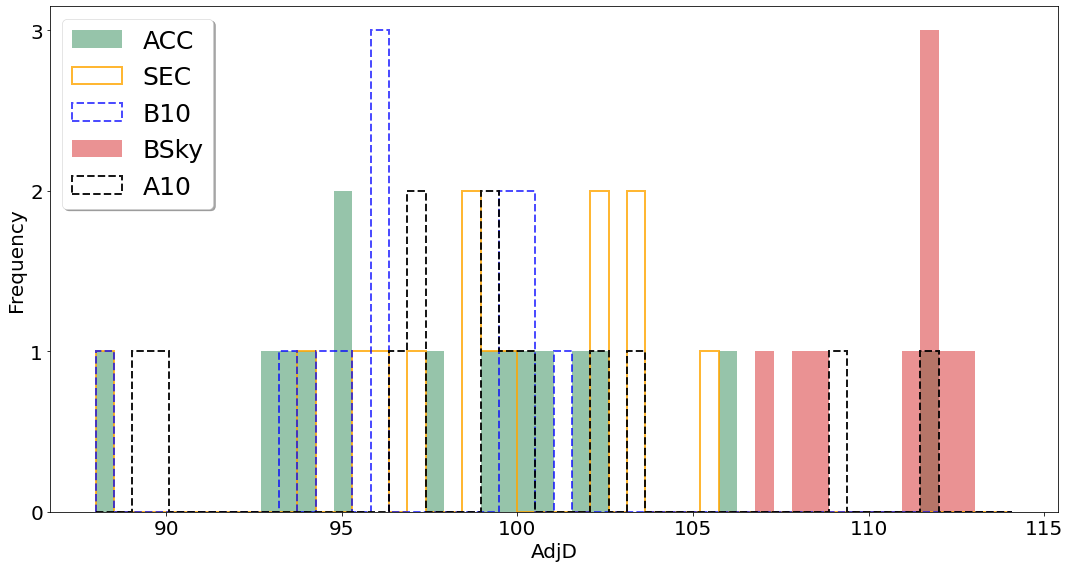

In [7]:
#choose colors, style and histtype
colors = vis.Color_palette(0)
colors[0] = 'seagreen'
colors[1] = 'orange'
colors[2] = 'b'
colors[4] = 'k'
histtypes = ['bar', 'step', 'step', 'bar', 'step']
histlinestyles = ['solid','solid','dashed','solid','dashed']
alphas = [.5, .8,.7,.5,.9,.9]

#actual plot
fig, ax = plt.subplots(figsize = (15,8))
for i in range(len(Conferences)):
    df_temp = df14_5conf[df14_5conf.Conf.isin([Conferences[i]])]
    ser_temp = df_temp.AdjD
    save_fig = False
    if i == len(Conferences)-1:
        save_fig = True
    x, y, sy, binwidth, fig, ax = vis.nice_histogram(ser_temp, bins_adjd, show_plot = False, 
                                                    axis = ax, save = save_fig, figname='ex1.pdf',
                                                    figure = fig, data_label_hist = Conferences[i], 
                                                    color_hist = colors[i], plot_errors = False,
                                                    plot_hist = True, legend_loc=2, histtype = histtypes[i],
                                                    hist_alpha = alphas[i], hist_linestyle = histlinestyles[i],
                                                    legend_fs = 25, xlabel = 'AdjD', hist_linewidth=2)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig

#  Difference in AdjO, Mean and Median

## Difference in AdjO

The goal is to plot difference in AdjO between 2014 and 2009 vs AdjO in 2009.
Choose relevant columns and rename them to enable merging of dataframes.

In [8]:
df09_sub = df09[['Team', 'Conf', 'AdjO']]
df14_sub = df14[['Team', 'Conf', 'AdjO']]
df09_sub = df09_sub.rename(columns={"AdjO": "AdjO09", "Conf":"Conf09"})
df14_sub = df14_sub.rename(columns={"AdjO": "AdjO14", "Conf":"Conf14"})
df14_sub.head()

,Team,Conf14,AdjO14
0,Louisville 4,Amer,118.9
1,Arizona 1,P12,116.5
2,Florida 1,SEC,116.5
3,Virginia 1,ACC,114.8
4,Wisconsin 2,B10,122.0


Merge dataframes

In [9]:
df_comb = pd.merge(df09_sub, df14_sub, left_on='Team', right_on='Team', how = 'inner')
df_comb.head() #some teams changed conference, we therefore use the conference of 2014
#For plot colours we will use conference of 2014

,Team,Conf09,AdjO09,Conf14,AdjO14
0,Syracuse 3,BE,117.0,ACC,114.6
1,Texas 7,B12,112.2,B12,111.8
2,Utah 5,MWC,110.8,P12,110.7
3,Florida 1,SEC,115.1,SEC,116.5
4,Houston,CUSA,109.2,Amer,111.1


Compute the difference.

In [10]:
df_comb['AdjO_diff'] = df_comb['AdjO14']-df_comb['AdjO09']
df_comb.head()

,Team,Conf09,AdjO09,Conf14,AdjO14,AdjO_diff
0,Syracuse 3,BE,117.0,ACC,114.6,-2.4
1,Texas 7,B12,112.2,B12,111.8,-0.4
2,Utah 5,MWC,110.8,P12,110.7,-0.1
3,Florida 1,SEC,115.1,SEC,116.5,1.4
4,Houston,CUSA,109.2,Amer,111.1,1.9


We see that some teams have changed conferences. For the plot we choose the color of the 2014 conference.

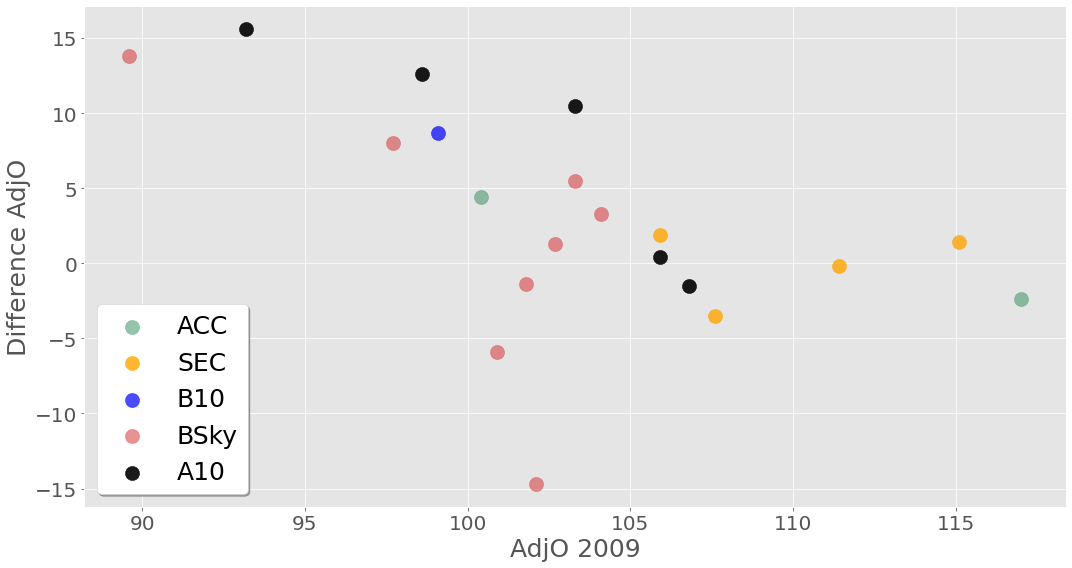

In [11]:
fig, ax = plt.subplots(figsize = (15,8))
for i in range(len(Conferences)):
    df_temp = df_comb[df_comb.Conf14.isin([Conferences[i]])]
    save_fig = False
    if i == len(Conferences)-1:
        save_fig = True
    ax, fig = vis.nice_plot(df_temp['AdjO09'], df_temp['AdjO_diff'], show_plot = False, scatter = True, 
                                                        axis = ax, save_plot = save_fig, figname='ex2.pdf',
                                                        figure = fig, data_label = Conferences[i],                                                 
                                                        legend_loc=3, color = colors[i], alpha = alphas[i],                                     
                                                        legend_fs = 25, xlabel = 'AdjO 2009', 
                                                        ylabel = 'Difference AdjO', scr_markersize = 200)
fig

## Compute Mean and Median 

Split data into 5 conferences and rest.

In [12]:
df_comb_red = df_comb[df_comb.Conf14.isin(Conferences)]
df_comb_rest = df_comb[~df_comb.Conf14.isin(Conferences)]
df_comb_red.head()

,Team,Conf09,AdjO09,Conf14,AdjO14,AdjO_diff
0,Syracuse 3,BE,117.0,ACC,114.6,-2.4
3,Florida 1,SEC,115.1,SEC,116.5,1.4
6,Dayton 11,A10,103.3,A10,113.8,10.5
7,Vanderbilt,SEC,107.6,SEC,104.1,-3.5
11,Mississippi,SEC,111.4,SEC,111.2,-0.2


In [13]:
#Compute mean and median
Mean5 = df_comb_red.groupby('Conf14').mean()
Med5 = df_comb_red.groupby('Conf14').median()
MeanRest = df_comb_rest['AdjO_diff'].mean()
MedRest = df_comb_rest['AdjO_diff'].median()
Mean = Mean5['AdjO_diff'].append(pd.Series([MeanRest], index = ['Rest']))
Median = Med5['AdjO_diff'].append(pd.Series([MedRest], index = ['Rest']))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


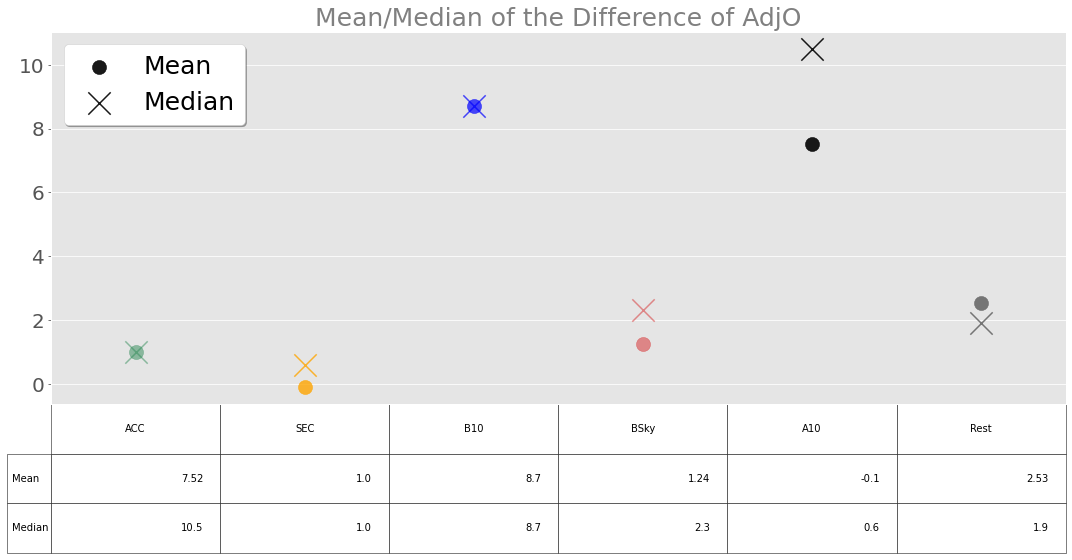

In [14]:
Conferences = ['ACC', 'SEC', 'B10', 'BSky', 'A10']
Conferences.append('Rest')
colors[5] = 'dimgrey'
#Add table
median_list = [round(m,2) for m in list(Median)]
mean_list = [round(m,2) for m in list(Mean)]
cellText = [mean_list, median_list]
collabels = Conferences
rowlabels = ['Mean', 'Median']

x_axis = np.arange(len(Conferences))

fig, ax = plt.subplots(figsize = (15,9))

for i in range(len(Conferences)):
    label_mean = None
    if i == len(Conferences)-1:
        ax.set_xticks(x_axis)
        ax.set_xticklabels(Conferences)
    if i ==4:
        label_mean  = 'Mean'
    ax, fig = vis.nice_plot(x_axis[i], Mean[Conferences[i]], show_plot = False, scatter = True, 
                                    axis = ax, 
                                    figure = fig, data_label = label_mean,                                                 
                                    legend_loc=3, color = colors[i], alpha = alphas[i],                                     
                                    legend_fs = 25, xlabel = 'Conference', 
                                    scr_markersize = 200)
for i in range(len(Conferences)):
    label_med = None
    if i == len(Conferences)-1:
        ax.set_xticks(x_axis)
        ax.set_xticklabels(Conferences)
        kwargs = {'fontsize':25, 'alpha':.7}
        ax.table(cellText = cellText, rowLabels = rowlabels, colLabels = collabels, 
                bbox = [0,-0.4,1,.4], **kwargs)#tale
    if i ==4:
        label_med = 'Median'
    ax, fig = vis.nice_plot(x_axis[i], Median[Conferences[i]], show_plot = False, scatter = True, 
                                    axis = ax, 
                                    figure = fig, data_label = label_med,                                                 
                                    legend_loc=2, color = colors[i], alpha = alphas[i],                                     
                                    legend_fs = 25, xlabel = 'Conference', 
                                    scr_markersize = 500, scr_markerstyle='x')
    ax.set_title('Mean/Median of the Difference of AdjO', fontsize = 25,  color = 'grey')
    ax.set_xlim((-.5,5.5))
    ax.set_xticks([])
    ax.set_xlabel('')
    #fig.tight_layout()
    fig.savefig('ex2_2.pdf')
fig

# Include Conference BE and repeat 1 and 2

## Repeat Ex. 1 

In [15]:
Conferences = ['ACC', 'SEC', 'B10', 'BSky', 'A10', 'BE']
df14_5conf = df14[df14.Conf.isin(Conferences)]

num_bins = 51
max_adjd = df14_5conf['AdjD'].max()
min_adjd = df14_5conf['AdjD'].min()
bins_adjd = np.arange(min_adjd, max_adjd, (max_adjd-min_adjd)/num_bins )

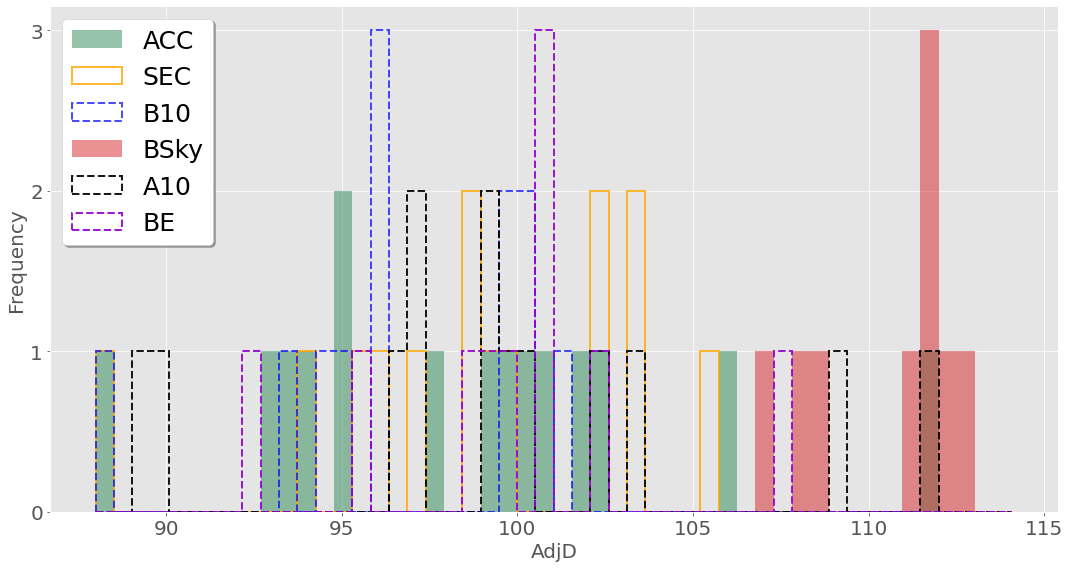

In [16]:
colors = vis.Color_palette(0)
colors[0] = 'seagreen'
colors[1] = 'orange'
colors[2] = 'b'
colors[4] = 'k'
colors[5] = 'darkviolet'
histtypes = ['bar', 'step', 'step', 'bar', 'step', 'step', 'step']
histlinestyles = ['solid','solid','dashed','solid','dashed', 'dashed', 'dashed']
alphas = [.5, .8,.7,.5,.9, .9,.9]
#actual plot
fig, ax = plt.subplots(figsize = (15,8))
for i in range(len(Conferences)):
    df_temp = df14_5conf[df14_5conf.Conf.isin([Conferences[i]])]
    ser_temp = df_temp.AdjD
    save_fig = False
    if i == len(Conferences)-1:
        save_fig = True
    x, y, sy, binwidth, fig, ax = vis.nice_histogram(ser_temp, bins_adjd, show_plot = False, 
                                                             axis = ax, save = save_fig, figname='ex3_1.pdf',
                                                            figure = fig, data_label_hist = Conferences[i], 
                                                             color_hist = colors[i], plot_errors = False,
                                                            plot_hist = True, legend_loc=2, histtype = histtypes[i],
                                                            hist_alpha = alphas[i], hist_linestyle = histlinestyles[i],
                                                            legend_fs = 25, xlabel = 'AdjD')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig

## Repeat Ex. 2.1

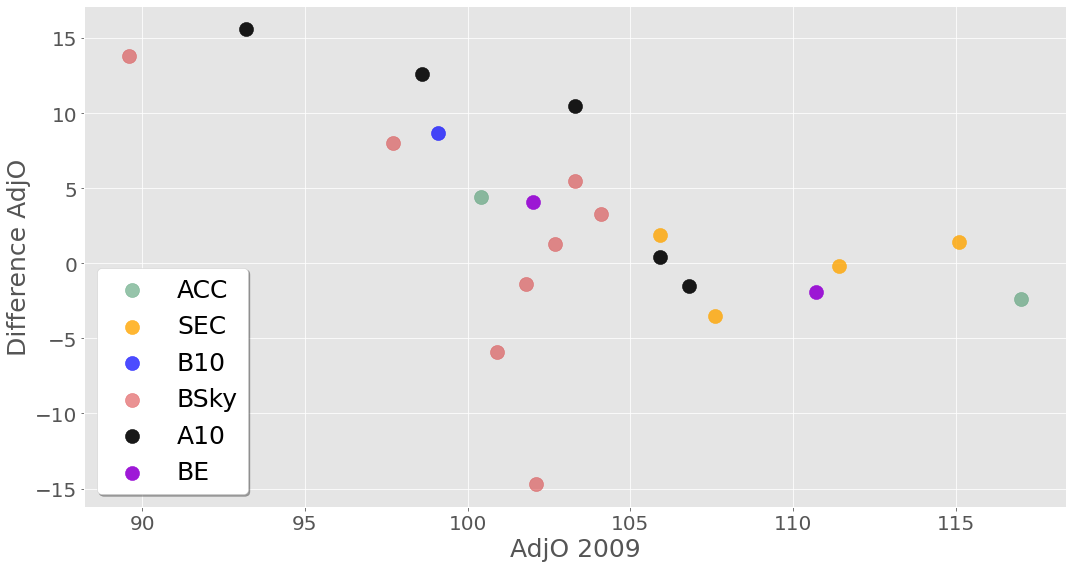

In [17]:
fig, ax = plt.subplots(figsize = (15,8))
for i in range(len(Conferences)):
    df_temp = df_comb[df_comb.Conf14.isin([Conferences[i]])]
    save_fig = False
    if i == len(Conferences)-1:
        save_fig = True
    ax, fig = vis.nice_plot(df_temp['AdjO09'], df_temp['AdjO_diff'], show_plot = False, scatter = True, 
                                    axis = ax, save_plot = save_fig, figname='ex3_2_1.pdf',
                                    figure = fig, data_label = Conferences[i],                                                 
                                    legend_loc=3, color = colors[i], alpha = alphas[i],                                     
                                    legend_fs = 25, xlabel = 'AdjO 2009', 
                                    ylabel = 'Difference AdjO', scr_markersize = 200,
                                    dpi =80)
fig

## Repeat Ex. 2.2 

In [19]:
#split data in conferences
df_comb_red = df_comb[df_comb.Conf14.isin(Conferences)]
df_comb_rest = df_comb[~df_comb.Conf14.isin(Conferences)]

#Compute mean and median
Mean5 = df_comb_red.groupby('Conf14').mean()
Med5 = df_comb_red.groupby('Conf14').median()
MeanRest = df_comb_rest['AdjO_diff'].mean()
MedRest = df_comb_rest['AdjO_diff'].median()
Mean = Mean5['AdjO_diff'].append(pd.Series([MeanRest], index = ['Rest']))
Median = Med5['AdjO_diff'].append(pd.Series([MedRest], index = ['Rest']))

In [ ]:
fig, ax = plt.subplots(figsize = (15,9))
#Add table
median_list = [round(m,2) for m in list(Median)]
mean_list = [round(m,2) for m in list(Mean)]
cellText = [mean_list, median_list]
colors[6] = 'dimgrey'
rowlabels = ['Mean', 'Median']

Conferences = ['ACC', 'SEC', 'B10', 'BSky', 'A10', 'BE', 'Rest']
collabels = Conferences

x_axis = np.arange(len(Conferences))

for i in range(len(Conferences)):
    label_mean = None
    if i == len(Conferences)-1:
        ax.set_xticks(x_axis)
        ax.set_xticklabels(Conferences)
    if i ==4:
        label_mean  = 'Mean'
    ax, fig = vis.nice_plot(x_axis[i], Mean[Conferences[i]], show_plot = False, scatter = True, 
                                    axis = ax, 
                                    figure = fig, data_label = label_mean,                                                 
                                    legend_loc=3, color = colors[i], alpha = alphas[i],                                     
                                    legend_fs = 25, xlabel = 'Conference', 
                                    scr_markersize = 200)
for i in range(len(Conferences)):
    label_med = None
    if i == len(Conferences)-1:
        ax.set_xticks(x_axis)
        ax.set_xticklabels(Conferences)
        kwargs = {'fontsize':25, 'alpha':.7}
        ax.table(cellText = cellText, rowLabels = rowlabels, colLabels = collabels, 
                bbox = [0,-0.4,1,.4], **kwargs)#tale
    if i ==4:
        label_med = 'Median'
    ax, fig = vis.nice_plot(x_axis[i], Median[Conferences[i]], show_plot = False, scatter = True, 
                                    axis = ax, 
                                    figure = fig, data_label = label_med,                                                 
                                    legend_loc=2, color = colors[i], alpha = alphas[i],                                     
                                    legend_fs = 25, xlabel = 'Conference', 
                                    scr_markersize = 500, scr_markerstyle='x')
    ax.set_title('Mean/Median of the Difference of AdjO', fontsize = 25,  color = 'grey')
    ax.set_xlim((-.5,6.5))
    ax.set_xticks([])
    ax.set_xlabel('')
    #fig.tight_layout()
    fig.savefig('ex3_2_2.pdf')
fig

# Extra 

In [ ]:
import PyPDF2, re

Functions to clean the text and extract names in a list

In [ ]:
def remove_digits(text):
    return ''.join([i for i in text if not i.isdigit()])

def clean_text(text):
    imax = 5000
    i = 0
    pattern  = '\n'+'[A-Z0-9]'+'\n'
    m = re.search(pattern, text, 1)
    while (not(m==None) and (i<imax) ):
        spec_pattern = '\n'+m.group(0)[1]+'\n'
        text = text.replace(spec_pattern, ' '+m.group(0)[1])
        m = re.search(pattern, text, 1)
        i+=1   
    return text

def remove_organisations(text):
    imax = 5000
    i = 0
    text = re.sub(r"\([^()]*\)", "", text)
    return text

def remove_lower(text): return re.sub(',[a-z]', '', text)

def clear_page(text):
    text = text.replace('\n,\n', ' ')
    text = remove_digits(text)
    #Remove header
    text = clean_text(text)
    text = remove_organisations(text)
    text = text.replace(',,', ',')
    text = text.replace('  ', ',')
    text = text.replace(' \n', ',')
    text = text.replace('\n', '')
    text = remove_lower(text)
    text = text.replace(' ', '')
    text = text.replace(',.', ',L.')
    text = text.replace(',AND', ',')
    #one could also remove the apostrophs in the names, 
    #but for now we leave it as it is, which would change the order
    return text

In [ ]:
pdfReader = PyPDF2.PdfFileReader('authors.pdf')
Text = []
for i in range(11):
    pageObj = pdfReader.getPage(i)
    p = pageObj.extractText()[1:]
    if i==0:
        start_index = p.find('P.A\nBBOTT')
        p = p[start_index:]
    p = clear_page(p)
    Text.append(p)
stop_index = Text[10].find('LIGO,CaliforniaInstituteof')
Text[10] = Text[10][:stop_index]
Text[10] = Text[10].replace('ANDP.A.WOUDT', 'P.A.WOUDT')

Example of cleaned text

In [ ]:
Text[0][:500]

In [ ]:
Text_all = []
for i in range(len(Text)):
    Text[i] = Text[i].split(',')
#remove last entry, which is empty
for i in range(10):
    Text[i] = Text[i][:-1]

Delete empty entries

In [ ]:
Text_arr = np.array([])
for i in range(11):
    Text_arr = np.concatenate((Text_arr, np.array(Text[i]) ) )
Text_arr = Text_arr.flatten()
Text_arr.shape
Text_arr = np.delete(Text_arr, obj = np.where(Text_arr ==''))

In [ ]:
Text_arr.shape #total number of names

In [ ]:
names_unique, unique_indices, unique_counts = np.unique(Text_arr, return_index = True, return_counts = True)
#np.unique returns an already sorted array
names_unique, names_unique.shape, Text_arr.shape

There are 3478 unique names

The two names in the middle are:

In [ ]:
names_unique[int(len(names_unique)/2)], names_unique[int(len(names_unique)/2-1)]